In [881]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as gridspec
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor


In [882]:
data1 = pd.read_csv('sample_submission.csv')
data2 = pd.read_csv('test.csv')
data3 = pd.read_csv('train.csv')
# display(data1.head())
# display(data2.head())
display(data3.head())

    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [883]:
data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [884]:
print(data3.columns)
data3.shape

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


(8523, 12)

In [885]:
print('\n')
print('------ Informacao -------')
print('\n')
print(data3.info()) #Informações
print('\n')
print('------ Valores Unicos -------')
print('\n')
print(data3.apply(lambda x: len(x.unique()))) #Verificar se há valores unicos
print('\n')
print('------- Valores Nulos --------')
print('\n')
print(data3.isnull().sum())




------ Informacao -------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


------ V

<Axes: >

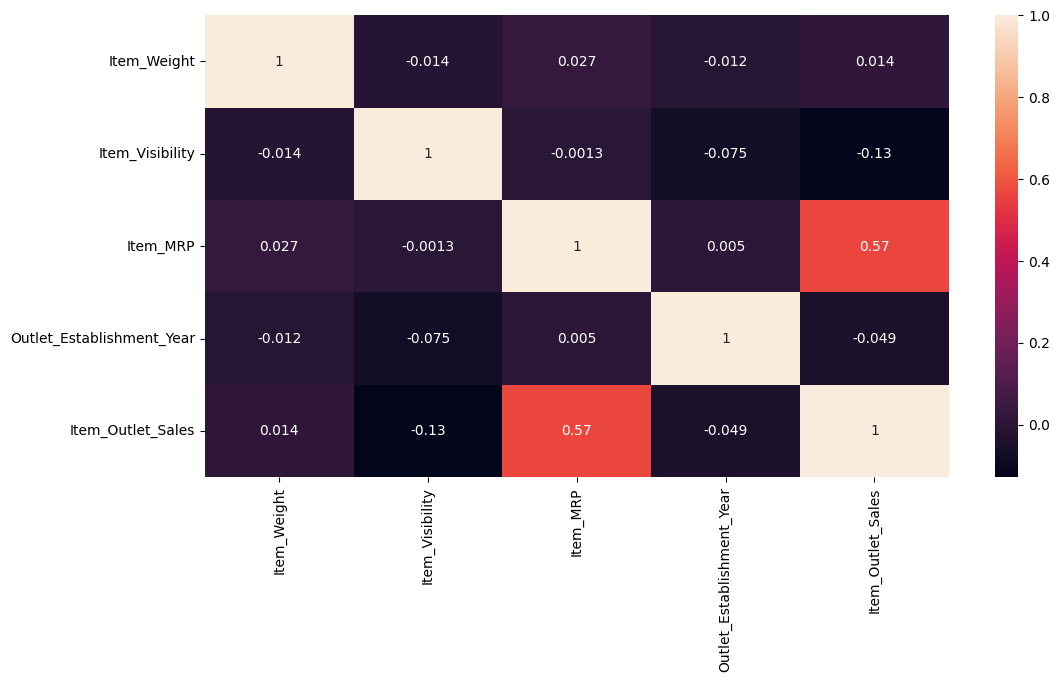

In [886]:
correlacao = data3.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(correlacao, annot = True)


In [887]:
data3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [888]:
def MartSales(data, column, count = True):
    print(f'\nQuantidade de valores Unicos: {data[column].nunique()}')
    print(f'\nQuais valores são unicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade de opção:\n {data[column].value_counts()}')

    if count == True:
      fig = plt.subplots(figsize = (13,7))
      ax = sns.countplot(data = data, x = column)
      ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
      ax.tick_params(axis = 'x', labelsize = 9)
    else:
        fig = plt.subplots(figsize = (13,7))
        sns.displot(data[column], kde = True)


Quantidade de valores Unicos: 3

Quais valores são unicos: ['Medium' nan 'High' 'Small']

Quantidade de valores nulos: 2410

Quantidade de opção:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


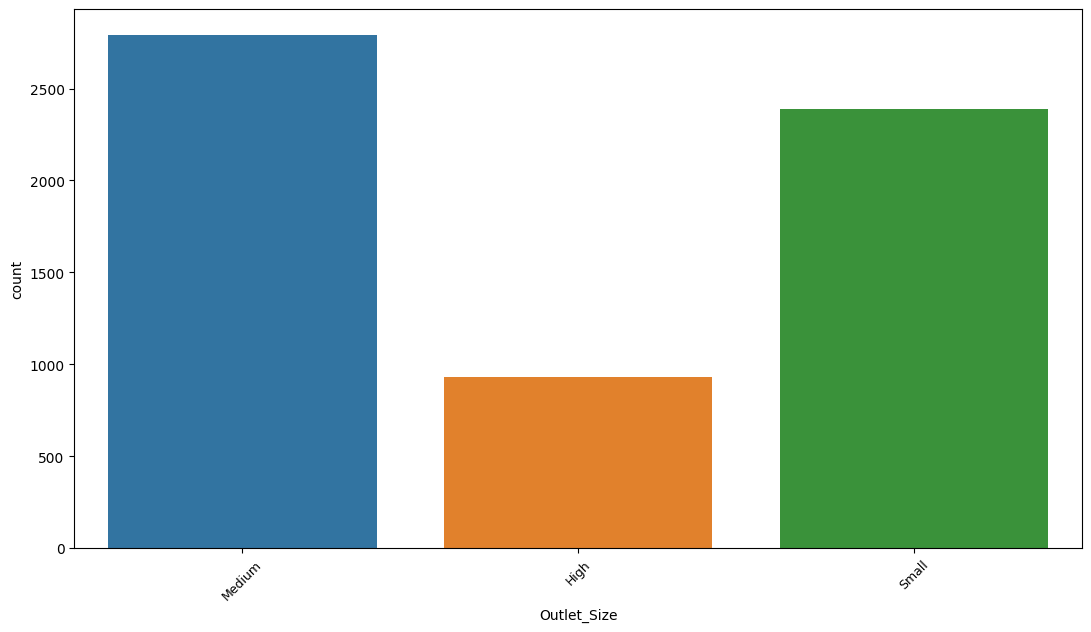

In [889]:
MartSales(data3,'Outlet_Size')



Quantidade de valores Unicos: 16

Quais valores são unicos: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Quantidade de valores nulos: 0

Quantidade de opção:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


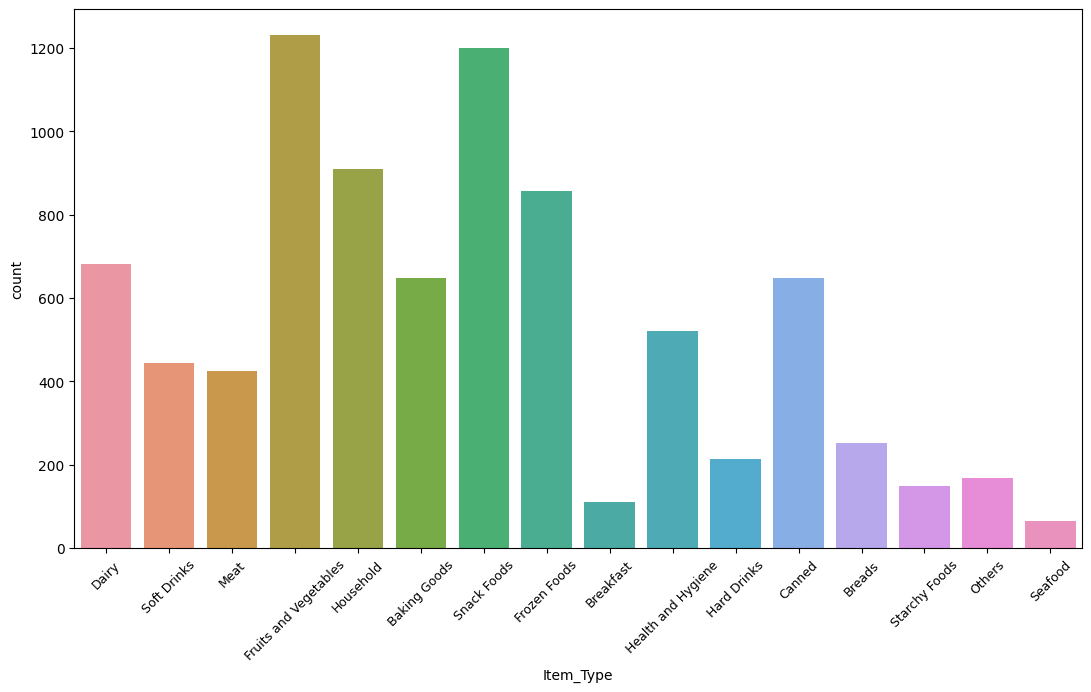

In [890]:
# Ao observar o item que foi mais cadastrado, entende-se que estes itens são os mais rotacionados nas lojas.
MartSales(data3, 'Item_Type')

In [891]:
cat_cols = data3.select_dtypes(exclude = 'number').columns.to_list()
num_cols = data3.select_dtypes(include = 'number').columns.to_list()


print('Colunas Numericas : ', num_cols)
print('Colunas Categoricas : ', cat_cols)

Colunas Numericas :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Colunas Categoricas :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [892]:
for cols in cat_cols: 
  print('-------------------')
  print('Series:', cols)
  print('-------------------')
  print(data3[cols].value_counts())
  print('\n')

-------------------
Series: Item_Identifier
-------------------
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


-------------------
Series: Item_Fat_Content
-------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


-------------------
Series: Item_Type
-------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


# Notas 

 - Dataset contem 8523 linhas e 12 colunas
 - 1559 itens diferentes 
 - Algumas features estava sem preenchimento da linha (Item_Weight e Outlet_Size)

 
 

 **Item_Identifier**:
  - 1559 itens diferentes
  - Seu inicio começa com letras na qual o código é um indicador do tipo (Item_Type)

**Item_Weight:** 
  - 1463 de valores nulos

**Fat_Content:** 
- Informação calórica do produto 
- 5 valores unicos

**Item_Types:**
- 16 tipos de itens classificados
- Muitas repetições de itens por categoria

**Outlet_Size:**
- Muitos valores nulos
- Os valores não são bem distribuido

**Outlet_Location_Type:**
- Não possui um parametro correlacional quando comparado com Outlet_Size
- Dado categorizado pobremente.



In [893]:
df1 = data3.copy()

# Alteração e Preenchimento de dados vazios

In [894]:
cols = [col.lower()for col in df1.columns]
df1.columns =cols
df1.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [895]:
df1['item_weight'].fillna(df1['item_weight'].mean(), inplace = True)


In [896]:
df1['outlet_size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [897]:
modelo_pivot = df1.pivot_table(values = 'outlet_size', 
                               columns = 'outlet_type',
                               aggfunc = lambda x: x.mode())

modelo_pivot

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
outlet_size,Small,Small,Medium,Medium


In [898]:
df1.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [899]:
# -------- Outlet Size -------
valores_nulos = df1['outlet_size'].isnull()  
df1.loc[valores_nulos,'outlet_size'] = df1.loc[valores_nulos, 'outlet_type'].apply(lambda x: modelo_pivot[x].outlet_size)

df1.isna().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [900]:
# ------- Item Visibility -------
#Valores Nulos; 
print('Total de valores vazios: {}'.format(sum(df1['item_visibility']== 0)))

#Preenchimento dos dados vazios em média;
df1['item_visibility'] = df1.loc[:, 'item_visibility'].replace(0, df1['item_visibility'].mean())

print('Total de valores vazios: {}'.format(sum(df1['item_visibility']== 0)))

Total de valores vazios: 526
Total de valores vazios: 0


In [901]:
# ------ Item Fat Content -------

df1['item_fat_content'].unique()
df1['item_fat_content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)
df1['item_fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: item_fat_content, dtype: int64

In [902]:
# ------- Item Category -------

df1['item_category'] = df1['item_identifier'].apply(lambda x: x[:2])
df1['item_category'].unique()
df1['item_category'] = df1['item_category'].replace({'FD': 'Food', 'DR': 'Drink','NC': 'Non-Consumable'})
df1['item_category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: item_category, dtype: int64

In [903]:
# ------- Item Fat Content -------

df1['item_fat_content'].value_counts()
df1.loc[df1['item_category'] == 'Non-Consumable', 'item_fat_content'] = 'No Edible'

df1['item_fat_content'].value_counts()

Low Fat      3918
Regular      3006
No Edible    1599
Name: item_fat_content, dtype: int64

In [904]:
# ------- Outlet Years -------

df1['outlet_years'] = 2013 - df1['outlet_establishment_year']
df1['outlet_years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: outlet_years, Length: 8523, dtype: int64

In [905]:
df1.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'item_category', 'outlet_years'],
      dtype='object')

#**Análise e Visualização de dados**


In [906]:
df1.head()
correlacao = df1.corr()

In [907]:
df1.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'item_category', 'outlet_years'],
      dtype='object')

<Axes: xlabel='outlet_years', ylabel='count'>

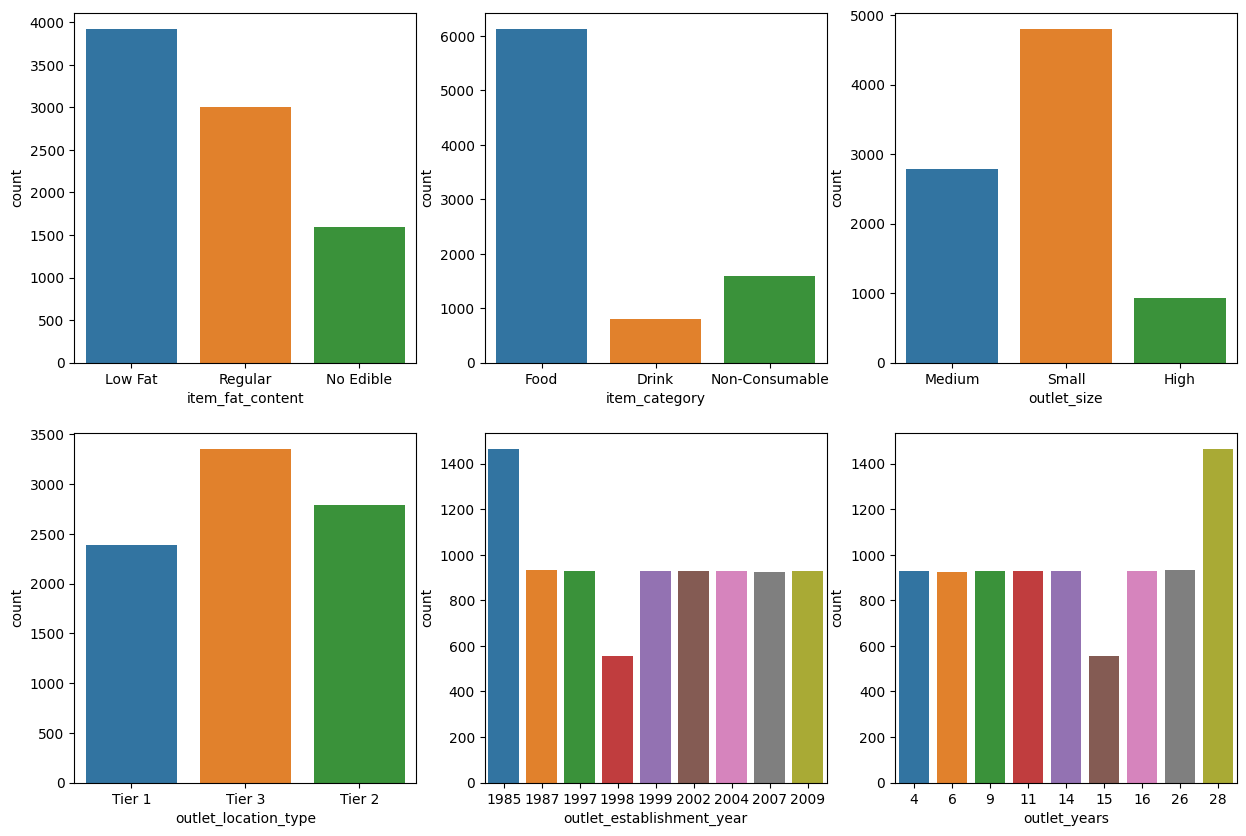

In [908]:
# item_fat_content ;  outlet_size ; outlet_location_type ; item_category; outlet_estabilishment_year ; outlet_years

fig, ax = plt.subplots(2,3, figsize = (15,10))

sns.countplot(df1, x = 'item_fat_content', ax = ax[0,0])

sns.countplot(df1,x= 'item_category', ax = ax[0,1])

sns.countplot(df1, x = 'outlet_size', ax = ax[0,2])

sns.countplot(df1, x = 'outlet_location_type', ax = ax[1,0])

sns.countplot(df1, x = 'outlet_establishment_year', ax = ax[1,1])

sns.countplot(df1, x = 'outlet_years', ax = ax[1,2])



[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

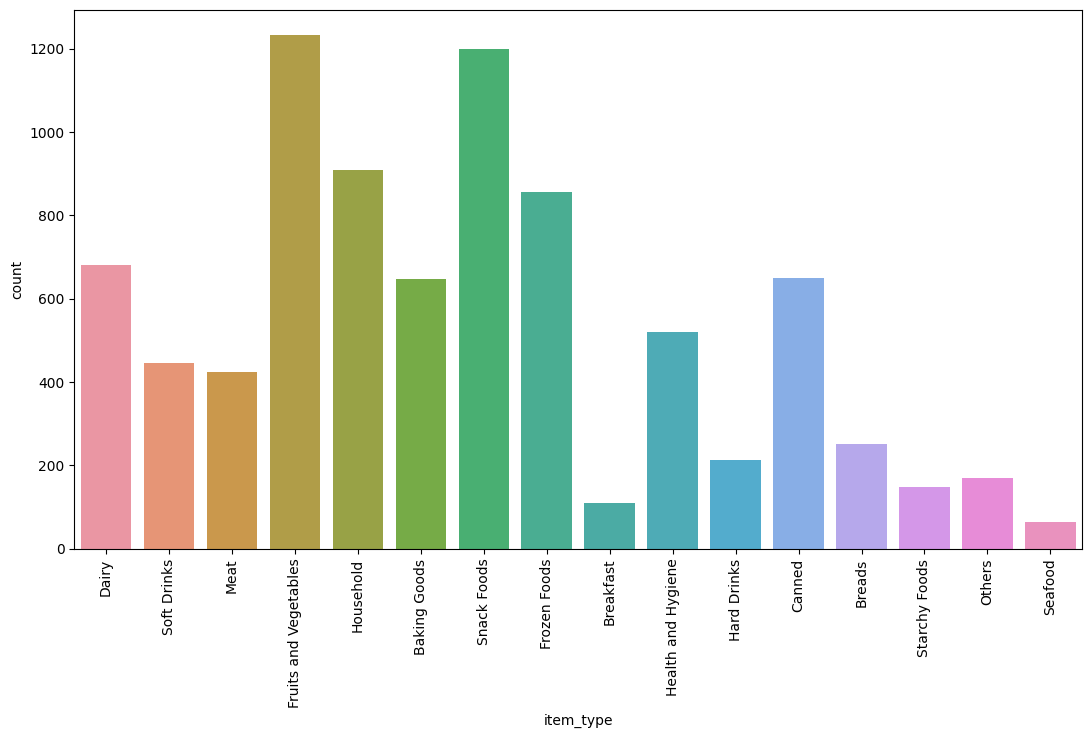

In [909]:
plt.subplots(figsize = (13,7))

labels = list(df1['item_type'].unique())

fig2 = sns.countplot(df1, x = 'item_type')

fig2.set_xticklabels(labels = labels, rotation = 90 )


<Axes: >

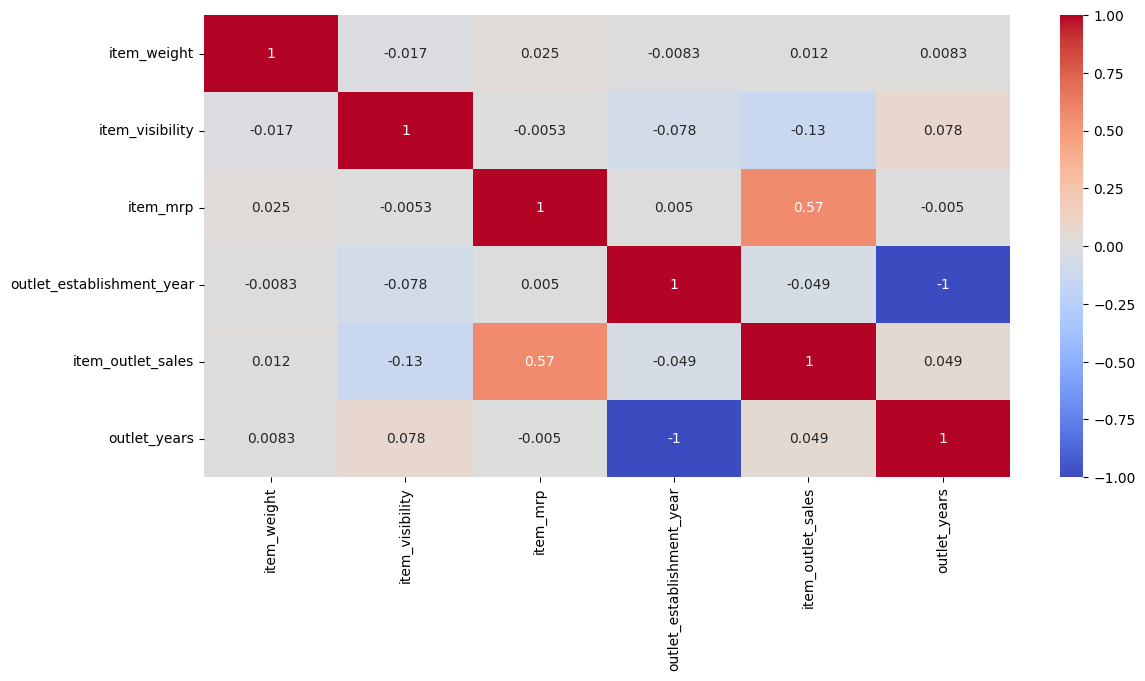

In [910]:
plt.subplots(figsize = (13,6))
sns.heatmap(correlacao, annot= True, cmap ='coolwarm')

array([[<Axes: title={'center': 'item_weight'}>,
        <Axes: title={'center': 'item_visibility'}>],
       [<Axes: title={'center': 'item_mrp'}>,
        <Axes: title={'center': 'outlet_establishment_year'}>],
       [<Axes: title={'center': 'item_outlet_sales'}>,
        <Axes: title={'center': 'outlet_years'}>]], dtype=object)

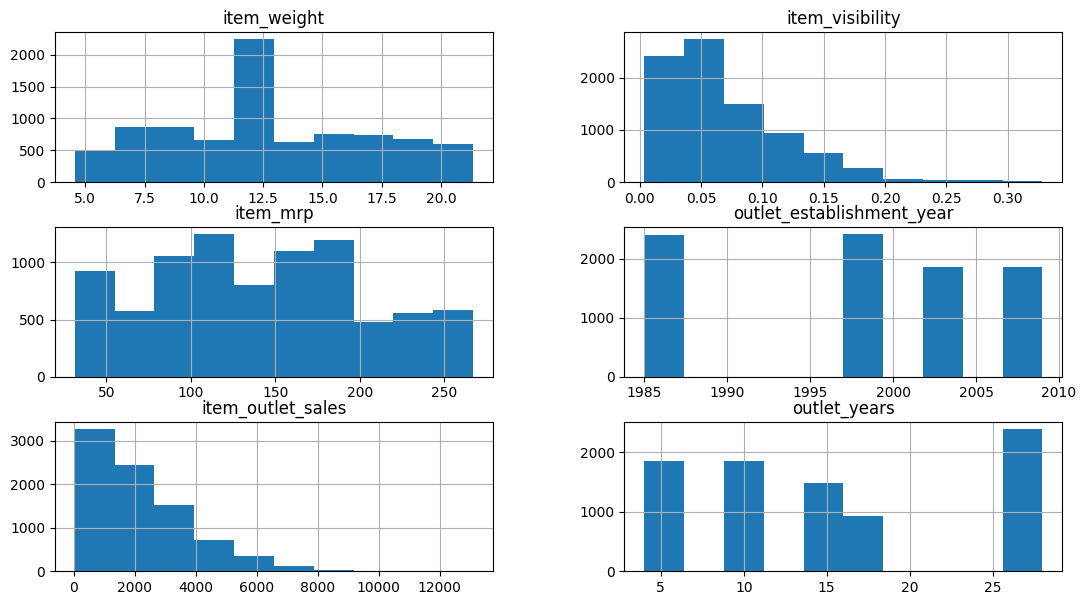

In [911]:
df1.hist(figsize = (13,7))

<Axes: xlabel='item_mrp', ylabel='item_outlet_sales'>

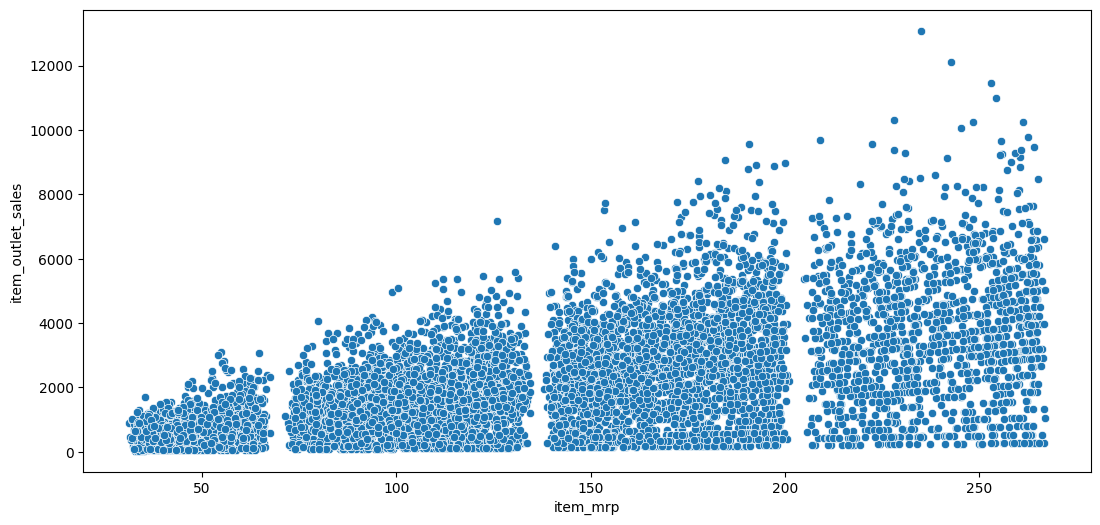

In [912]:
plt.subplots(figsize = (13,6))
sns.scatterplot(data = df1, x = 'item_mrp', y = 'item_outlet_sales')

#**Notas:**

- Mesmo após ter preenchido alguns dados em que estava em branco e categorizado outros que estava escrito de forma incorreta, os dados ainda parecem ser poucos correlacioandos. Desta forma, a unica variável que apresenta ter alguma relação é a de "item_outlet_sales" e "item_mrp"


#Inicio do Modelo Preditivo

In [913]:
# Transformar dados categoricos em numéricos
encoder = LabelEncoder()

cols_to_encode = ['item_identifier', 'item_type','outlet_identifier']

for col in cols_to_encode:
  df1[col] = encoder.fit_transform(df1[col]) 


df1 = pd.get_dummies(df1, columns = ['item_fat_content','outlet_size','outlet_location_type','outlet_type','item_category'])

In [914]:
# Definição de input 

X = df1.drop(columns = ['outlet_establishment_year','item_outlet_sales'])

y = df1['item_outlet_sales']

In [915]:
model_scores = pd.DataFrame(columns = ['model','rmse','r2_score'])

In [916]:
def model_train(model_name, model, X, y):
  #split data
  X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size= 0.2, random_state = 42)

  # Pipeline de treinamento
  pipeline = make_pipeline(StandardScaler(), model)

  # Treinar de forma escalável o modelo
  pipeline.fit(X_train,y_train)

  #Predição do Modelo
  y_predict = pipeline.predict(X_validate)
  
  #Validação do modelo
  rmse = np.sqrt(mean_squared_error(y_validate, y_predict)).round(2)
  model_score = ((r2_score(y_validate, y_predict).round(4))*100).round(2)
  
  #Acertos e Erros 
  model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]

  print('--------------------')
  print(f'Report:', model_name)
  print('--------------------')
  print(f'RMSE:', rmse)
  print(f'R2 Score: ', model_score)

In [917]:
# Regressão Linear ------ MELHOR MODELO

linear_regression = LinearRegression()
model_train('Linear Regression',linear_regression,X,y)

--------------------
Report: Linear Regression
--------------------
RMSE: 1066.95
R2 Score:  58.12


In [918]:
# Arvore de Decisão

decision_tree = DecisionTreeRegressor()
model_train('DecisionTree',decision_tree, X,y)

--------------------
Report: DecisionTree
--------------------
RMSE: 1505.76
R2 Score:  16.58


In [919]:
# Random Forest 
random_forest = RandomForestRegressor()
model_train('Random Forest',random_forest,X,y)

--------------------
Report: Random Forest
--------------------
RMSE: 1088.39
R2 Score:  56.42


In [920]:
model_pipeline = make_pipeline(StandardScaler(),LinearRegression())
model_pipeline.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#**Dados do Teste**

In [931]:
df2 = data2.copy()
cols = [col.lower()for col in df2.columns]
df2.columns = cols 